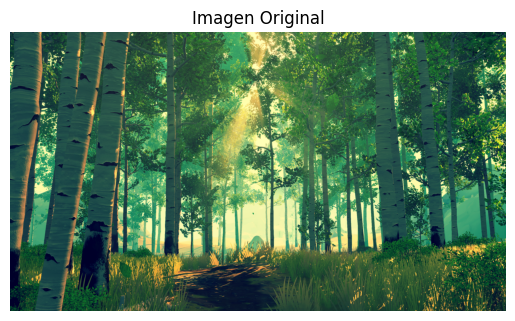

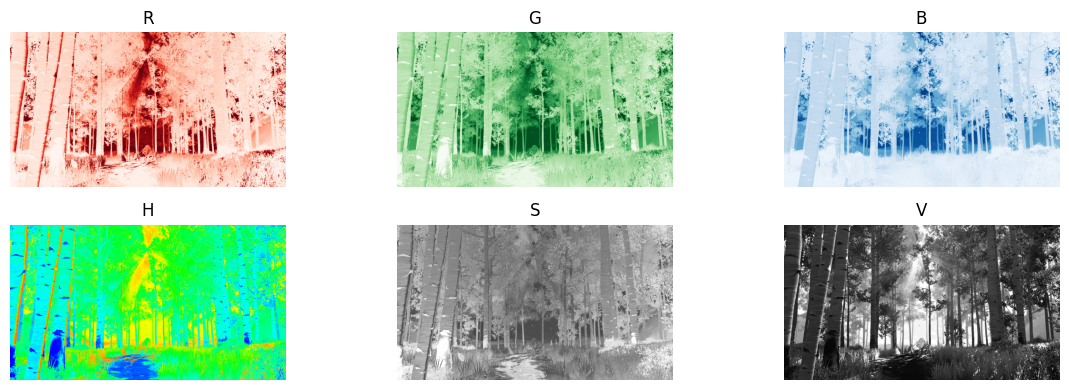

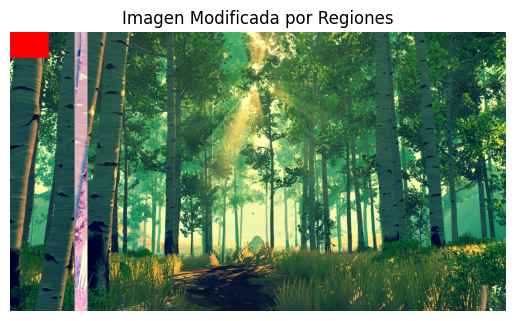

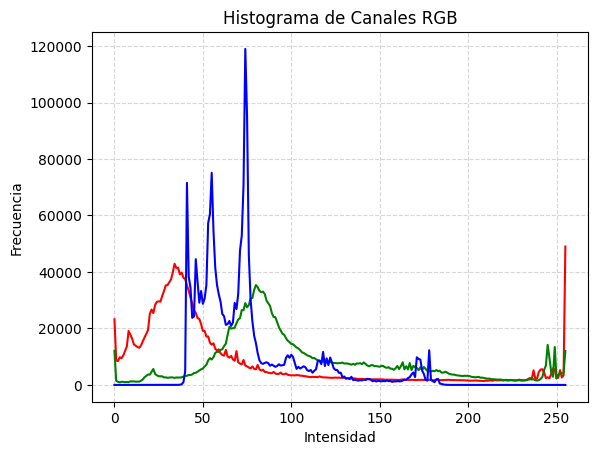

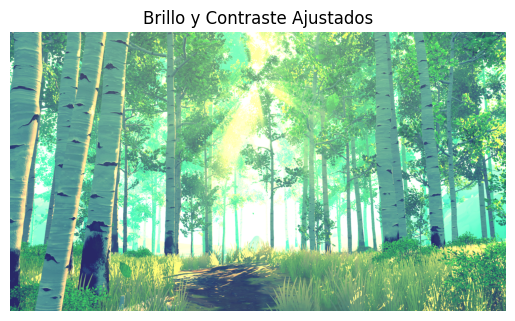

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carga de imagen y visualización básica
def cargar_imagen(ruta):
    """Carga una imagen en color y devuelve BGR y RGB"""
    bgr = cv2.imread(ruta)
    if bgr is None:
        raise FileNotFoundError("Imagen no encontrada.")
    rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    return bgr, rgb

def mostrar_imagen(imagen, titulo='Imagen', cmap=None):
    """Muestra una imagen usando matplotlib"""
    plt.imshow(imagen, cmap=cmap)
    plt.title(titulo)
    plt.axis('off')
    plt.show()


# Visualización de canales RGB y HSV
def mostrar_canales(img_bgr):
    """Separa y muestra canales RGB y HSV"""
    canales_rgb = cv2.split(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    canales_hsv = cv2.split(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV))
    titulos = ['R', 'G', 'B', 'H', 'S', 'V']
    mapas = ['Reds', 'Greens', 'Blues', 'hsv', 'gray', 'gray']
    todos = canales_rgb + canales_hsv

    plt.figure(figsize=(12, 4))
    for i, canal in enumerate(todos):
        plt.subplot(2, 3, i+1)
        plt.imshow(canal, cmap=mapas[i])
        plt.title(titulos[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()


# Modificación por regiones
def modificar_regiones(img_rgb):
    """Modifica porciones de la imagen usando slicing"""
    mod = img_rgb.copy()

    # Región superior izquierda a rojo
    mod[0:100, 0:150] = [255, 0, 0]

    # Copiar región central a esquina inferior derecha
    centro = mod[100:200, 100:200].copy()
    mod[-100:, -100:] = centro

    # Invertir una franja vertical
    mod[:, 250:300] = 255 - mod[:, 250:300]

    return mod


# Histograma de intensidad
def mostrar_histograma_rgb(img_rgb):
    """Muestra histograma de intensidad por canal"""
    colores = ('r', 'g', 'b')
    for i, color in enumerate(colores):
        hist = cv2.calcHist([img_rgb], [i], None, [256], [0, 256])
        plt.plot(hist, color=color)
    plt.title('Histograma de Canales RGB')
    plt.xlabel('Intensidad')
    plt.ylabel('Frecuencia')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()


# Ajuste de brillo y contraste
def ajustar_brillo_contraste(img, alpha=1.0, beta=0):
    """Aplica ajustes lineales a brillo (beta) y contraste (alpha)"""
    ajustada = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
    return ajustada


# Interactividad con sliders
def sliders_brillo_contraste(img_bgr):
    cv2.namedWindow('Ajustes')
    
    # Crear sliders después de crear la ventana
    alpha = cv2.createTrackbar('Contraste x10', 'Ajustes', 10, 30, lambda x: None)
    beta = cv2.createTrackbar('Brillo', 'Ajustes', 100, 200, lambda x: None)

    while True:
        alpha = cv2.getTrackbarPos('Contraste x10', 'Ajustes') / 10
        beta = cv2.getTrackbarPos('Brillo', 'Ajustes') - 100

        ajustada = ajustar_brillo_contraste(img_bgr, alpha, beta)
        cv2.imshow('Ajustes', ajustada)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cv2.destroyAllWindows()


ruta = '../datos/firewatch.png'
img_bgr, img_rgb = cargar_imagen(ruta)

mostrar_imagen(img_rgb, 'Imagen Original')

mostrar_canales(img_bgr)

img_mod = modificar_regiones(img_rgb)
mostrar_imagen(img_mod, 'Imagen Modificada por Regiones')

mostrar_histograma_rgb(img_rgb)

ajustada = ajustar_brillo_contraste(img_rgb, alpha=1.5, beta=40)
mostrar_imagen(ajustada, 'Brillo y Contraste Ajustados')

sliders_brillo_contraste(img_bgr)